In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot

# Data Import

In [2]:
#read shooting data
shootings = pd.read_csv('Datasets/Github/FatalPoliceShootingsData.csv', encoding="windows-1252")

#read income data
income = pd.read_csv('Datasets/Kaggle/MedianHouseholdIncome2015.csv', encoding="windows-1252")

#read poverty data
poverty = pd.read_csv('Datasets/Kaggle/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

#read high school graduation data
graduation = pd.read_csv('Datasets/Kaggle/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

#read race data
race = pd.read_csv('Datasets/Kaggle/ShareRaceByCity.csv', encoding="windows-1252")

# Data Cleaning

### Rename Columns

In [3]:
#Rename city & state columns for consistency
shootings.rename(columns = {'state':'Geographic Area', 'city':'City'}, inplace = True)
race.rename(columns = {'Geographic area':'Geographic Area'}, inplace = True) 

### Drop Unnecessary Columns

In [4]:
shootings = shootings.drop(['id','name','manner_of_death','armed','signs_of_mental_illness','threat_level','flee','body_camera'], axis=1)

### Clean Date Fields

In [5]:
#Convert dates from string to date
shootings['date'] = pd.to_datetime(shootings['date']) 

### Clean Numeric Fields

In [6]:
def clean_numeric(column):
    """Standardize and clean the city column in order to join the datasets.
    clean: the cleaned data column
    """
    #remove symbols
    clean = column.str.replace('+', '')
    clean = clean.str.replace('-', '')    
    clean = clean.str.replace(',', '')    
    
    #clean missing/blank values
    clean = clean.replace('(X)', np.nan)   
    clean = clean.replace('', np.nan)  
    
    #change data type to float
    clean = clean.astype(float)
    
    return clean

#clean each data frame's numeric columns
income['Median Income'] = clean_numeric(income['Median Income'])
poverty['poverty_rate'] = clean_numeric(poverty['poverty_rate'])
graduation['percent_completed_hs'] = clean_numeric(graduation['percent_completed_hs'])
race['share_white'] = clean_numeric(race['share_white'])
race['share_black'] = clean_numeric(race['share_black'])
race['share_native_american'] = clean_numeric(race['share_native_american'])
race['share_asian'] = clean_numeric(race['share_asian'])
race['share_hispanic'] = clean_numeric(race['share_hispanic'])

### Clean City Data

In [7]:
def clean_city(column):
    """Standardize and clean the city column in order to join the datasets.
    clean: the cleaned data column
    """
    #convert city to lower case
    clean = column.str.lower()
    
    # remove keywords: city, county, town, cdp, borough, village
    clean = clean.str.replace(' city', '')
    clean = clean.str.replace(' county', '')
    clean = clean.str.replace(' town', '')
    clean = clean.str.replace(' cdp', '')
    clean = clean.str.replace(' borough', '')
    clean = clean.str.replace(' village', '')
    return clean

#apply clean_city function to each data frame's city column
shootings['City'] = clean_city(shootings['City'])
income['City'] = clean_city(income['City'])
poverty['City'] = clean_city(poverty['City'])
graduation['City'] = clean_city(graduation['City'])
race['City'] = clean_city(race['City'])

### Update Categorical Data

In [8]:
#update race data - replace W, B, A, H, O with actual values
shootings['race'] = shootings['race'].str.replace('W', 'White')
shootings['race'] = shootings['race'].str.replace('B', 'Black')
shootings['race'] = shootings['race'].str.replace('H', 'Hispanic')
shootings['race'] = shootings['race'].str.replace('A', 'Asian')
shootings['race'] = shootings['race'].str.replace('N', 'Native-American')
shootings['race'] = shootings['race'].str.replace('O', 'Other')

#update gender data - replace M, F with actual values
shootings['gender'] = shootings['gender'].str.replace('M', 'Male')
shootings['gender'] = shootings['gender'].str.replace('F', 'Female')

#race dictionary for race = black vs other
race_dict = {'Black': 'Black', 
             'White': 'Other', 
             'Other': 'Other', 
             'Asian': 'Other',
             'Hispanic': 'Other',
             'Native-American': 'Other'}

#create new binary column for black vs. other race
shootings['is_black'] = shootings.race.map(race_dict)

# Data Merging

In [9]:
#join all the datasets using City/State as key and the shooting data as a driver
shootings = pd.merge(shootings, income, how='left', on=['Geographic Area', 'City'])
shootings = pd.merge(shootings, poverty, how='left', on=['Geographic Area', 'City'])
shootings = pd.merge(shootings, graduation, how='left', on=['Geographic Area', 'City'])
shootings = pd.merge(shootings, race, how='left', on=['Geographic Area', 'City'])

In [10]:
#view the new data structure
shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 0 to 5428
Data columns (total 15 columns):
date                     5429 non-null datetime64[ns]
age                      5186 non-null float64
gender                   5426 non-null object
race                     4806 non-null object
City                     5429 non-null object
Geographic Area          5429 non-null object
is_black                 4806 non-null object
Median Income            4767 non-null float64
poverty_rate             4806 non-null float64
percent_completed_hs     4806 non-null float64
share_white              4798 non-null float64
share_black              4798 non-null float64
share_native_american    4798 non-null float64
share_asian              4798 non-null float64
share_hispanic           4798 non-null float64
dtypes: datetime64[ns](1), float64(9), object(5)
memory usage: 678.6+ KB


# Exploratory Data Analysis

### Age

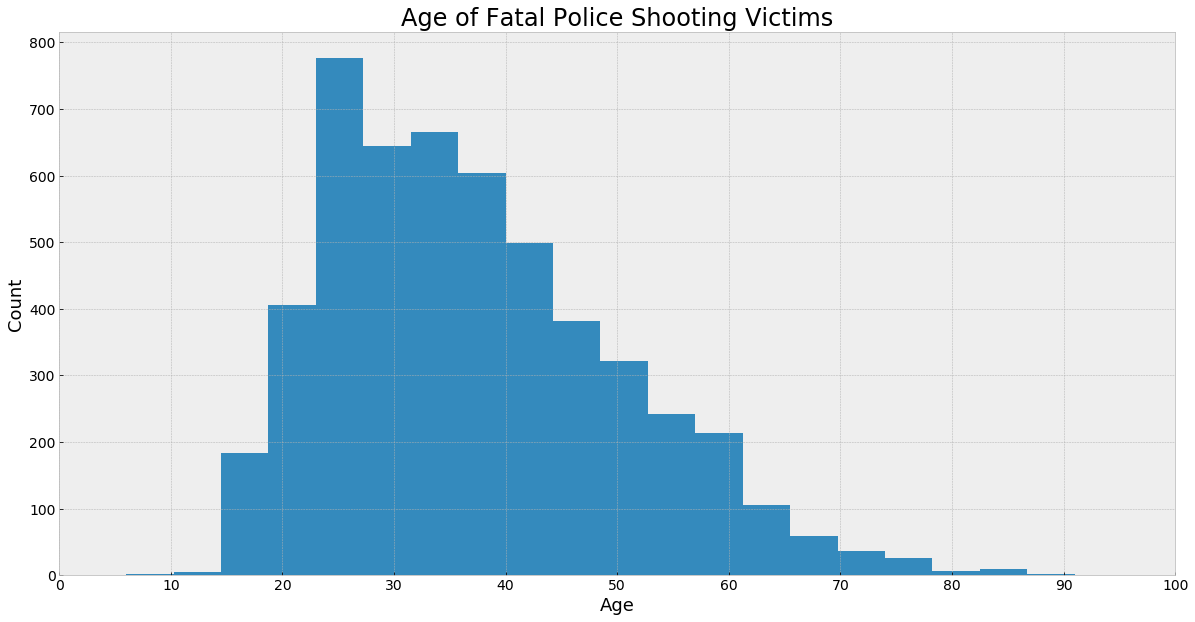

In [11]:
#set style for all the plots/histograms
plt.style.use('bmh')

#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#create histogram of age
shootings.hist(column = 'age', bins=20)

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.title('Age of Fatal Police Shooting Victims', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

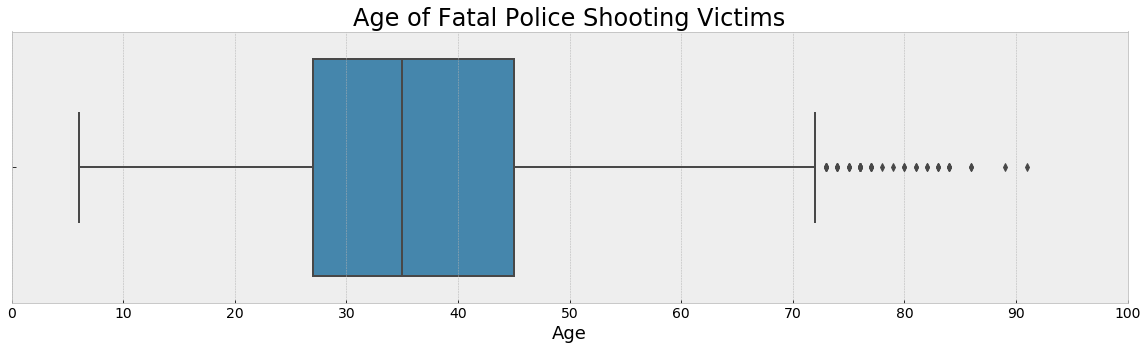

In [12]:
#change figure size
plt.rcParams["figure.figsize"] = (20,5)

#create boxplot
sns.boxplot(x='age', data=shootings)

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.title("Age of Fatal Police Shooting Victims", fontsize=24)
plt.xlabel('Age', fontsize=18)

#display plot
plt.show()

In [13]:
#define function to calculate upper and lower bounds for outlier detection
def outlier(column):
 sorted(column)
 Q1,Q3 = np.nanpercentile(column, [25,75])
 IQR = Q3 - Q1
 lower_range = round(Q1 - (1.5 * IQR),2)
 upper_range = round(Q3 + (1.5 * IQR),2)
 return lower_range,upper_range

In [14]:
#get upper and lower bounds for age outliers
age_low,age_high = outlier(shootings['age'])

print('The cutoffs for age outliers are ', age_low, 'and', age_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['age'] < age_low) | (shootings['age'] > age_high)]

#get the maximum age for use in binning
maxage = outliers['age'].max()

#create bins for outliers above higher cutoff
#since lower cutoff is 0 we will disregard those bins
bins_high = pd.cut(outliers['age'], [age_high, 80, 90, maxage])

#group data & get counts within each bin
outliers.groupby(bins_high)['age'].agg(['count'])


The cutoffs for age outliers are  0.0 and 72.0 .


,count
age,
"(72.0, 80.0]",35
"(80.0, 90.0]",14
"(90.0, 91.0]",1


In [15]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['age'].describe())

#calculate mode
print('\nMode:', shootings['age'].mode())

count    5186.000000
mean       37.006749
std        12.980118
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

Mode: 0    36.0
dtype: float64


### Median Income

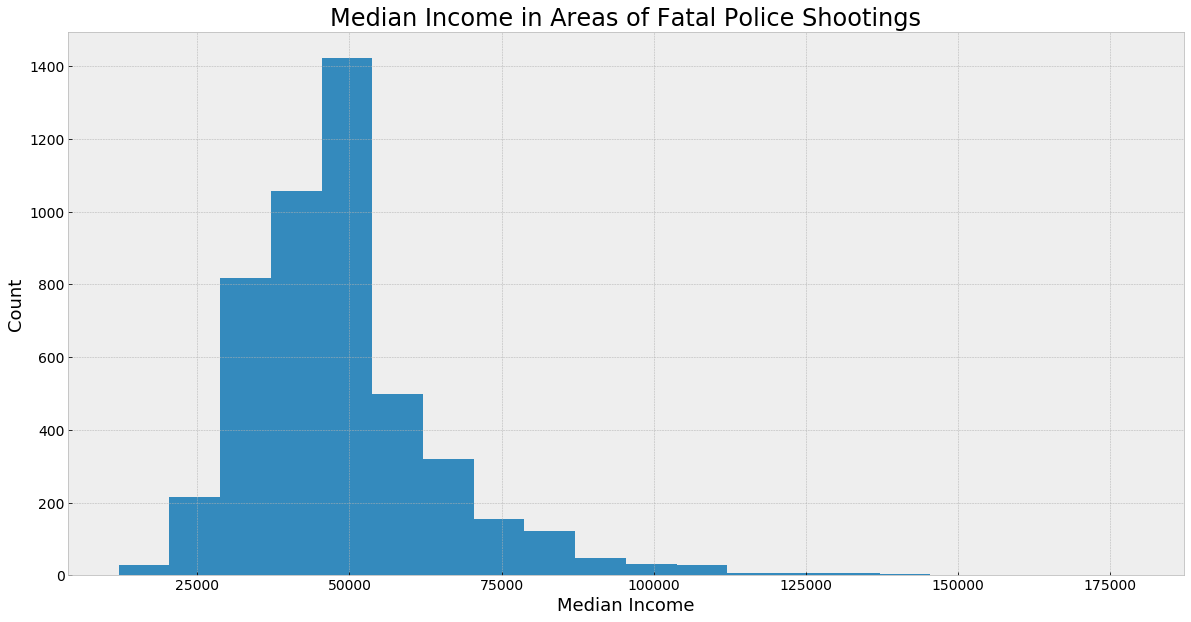

In [16]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#Create histogram of median income
shootings.hist(column = 'Median Income', bins=20)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.title('Median Income in Areas of Fatal Police Shootings', fontsize=24)
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

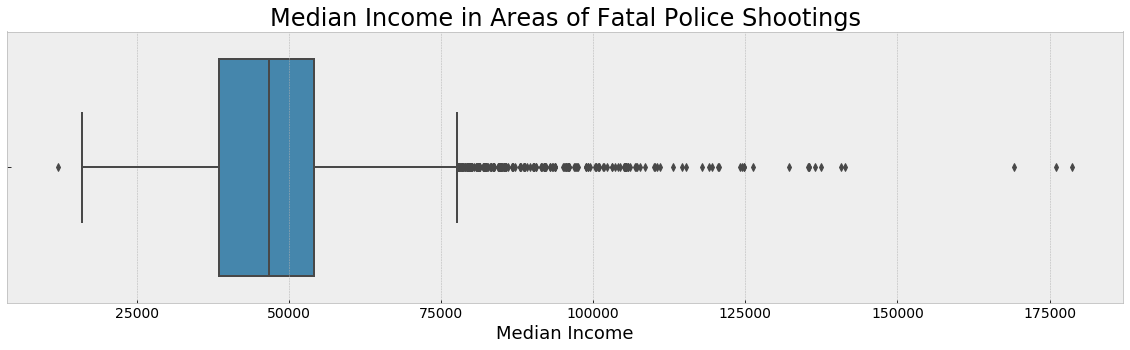

In [17]:
#change figure size
plt.rcParams["figure.figsize"] = (20,5)

#create boxplot
sns.boxplot(x='Median Income', data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.title('Median Income in Areas of Fatal Police Shootings', fontsize=24)
plt.xlabel('Median Income', fontsize=18)

#display plot
plt.show()

In [18]:
#get upper and lower bounds for median income outliers
inc_low,inc_high = outlier(shootings['Median Income'])

print('The cutoffs for Median Income outliers are ', inc_low, 'and', inc_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['Median Income'] < inc_low) | (shootings['Median Income'] > inc_high)]

#get the maximum median income for use in binning
maxinc = outliers['Median Income'].max()

#create bins for outliers below lower cutoff
bins_low = pd.cut(outliers['Median Income'], [0, inc_low])

#create bins for outliers above higher cutoff
bins_high = pd.cut(outliers['Median Income'], [inc_high, 100000, 150000, maxinc])

#group data & get counts within each bin
outliers_low = outliers.groupby(bins_low)['Median Income'].agg(['count'])
outliers_high = outliers.groupby(bins_high)['Median Income'].agg(['count'])

#concatenate lower & higher outliers
pd.concat([outliers_low.reset_index(),outliers_high.reset_index()],ignore_index=True)


The cutoffs for Median Income outliers are  15052.5 and 77724.5 .


,Median Income,count
0,"(0.0, 15052.5]",1
1,"(77724.5, 100000.0]",219
2,"(100000.0, 150000.0]",61
3,"(150000.0, 178765.0]",3


In [19]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['Median Income'].describe())

#calculate mode
print('\nMode:', shootings['Median Income'].mode())

count      4767.000000
mean      48682.177890
std       15983.059414
min       12083.000000
25%       38554.500000
50%       46764.000000
75%       54222.500000
max      178765.000000
Name: Median Income, dtype: float64

Mode: 0    50205.0
dtype: float64


### Poverty Rate

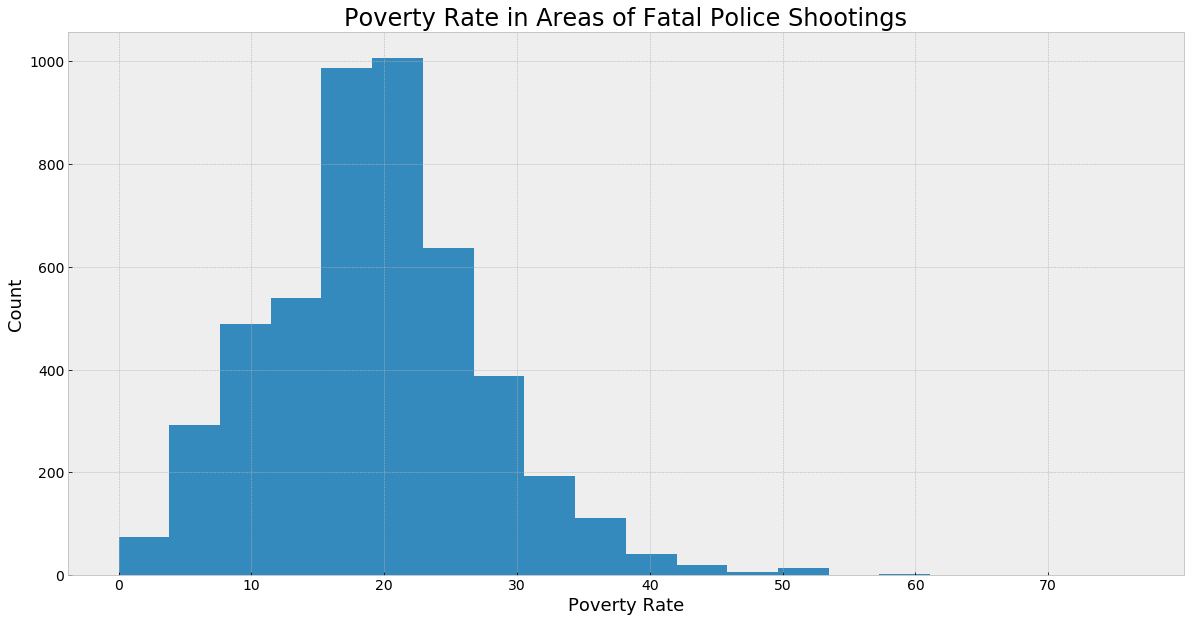

In [20]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#Create histogram of poverty rate
shootings.hist(column = 'poverty_rate', bins=20)

#modify tick frequency & size
plt.xticks(np.arange(0, 80, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.title('Poverty Rate in Areas of Fatal Police Shootings', fontsize=24)
plt.xlabel('Poverty Rate', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

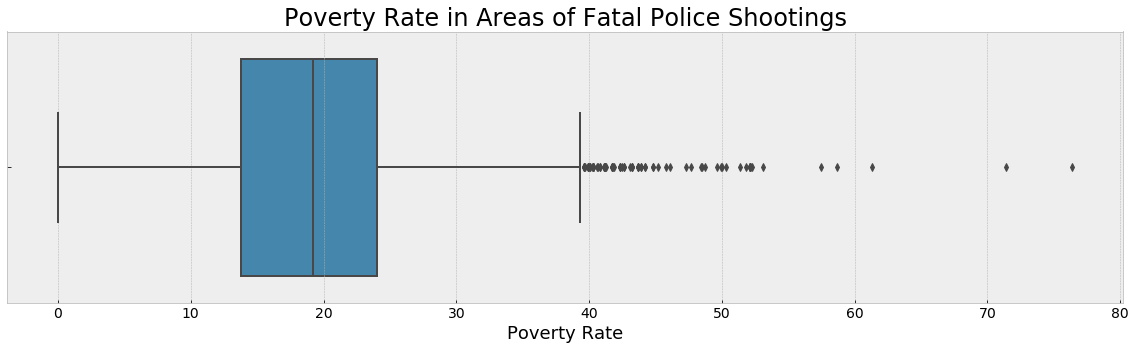

In [21]:
#change figure size
plt.rcParams["figure.figsize"] = (20,5)

#create boxplot
sns.boxplot(x='poverty_rate', data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.title('Poverty Rate in Areas of Fatal Police Shootings', fontsize=24)
plt.xlabel('Poverty Rate', fontsize=18)

#display plot
plt.show()

In [22]:
#get upper and lower bounds for poverty rate outliers
pov_low,pov_high = outlier(shootings['poverty_rate'])

print('The cutoffs for poverty rate outliers are ', pov_low, 'and', pov_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['poverty_rate'] < pov_low) | (shootings['poverty_rate'] > pov_high)]

#get the maximum median income for use in binning
maxpov = outliers['poverty_rate'].max()

#create bins for outliers above higher cutoff
#since lower cutoff <0, we will ignore lower bins
bins_high = pd.cut(outliers['poverty_rate'], [pov_high, 50, 60, 70, maxpov])

#group data & get counts within each bin
outliers.groupby(bins_high)['poverty_rate'].agg(['count'])

The cutoffs for poverty rate outliers are  -1.5 and 39.3 .


,count
poverty_rate,
"(39.3, 50.0]",65
"(50.0, 60.0]",15
"(60.0, 70.0]",1
"(70.0, 76.4]",2


In [23]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['poverty_rate'].describe())

#calculate mode
print('\nMode:', shootings['poverty_rate'].mode())

count    4806.000000
mean       19.341906
std         8.243787
min         0.000000
25%        13.800000
50%        19.200000
75%        24.000000
max        76.400000
Name: poverty_rate, dtype: float64

Mode: 0    22.1
dtype: float64


### Graduation Rate

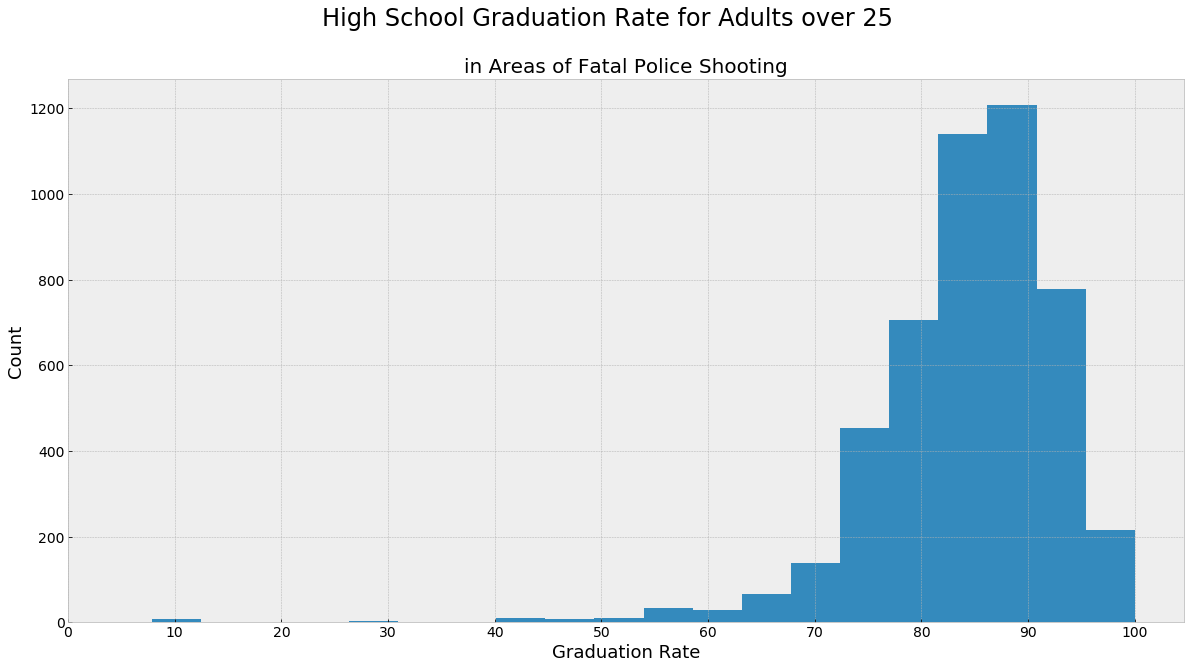

In [24]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#Create histogram of high school graduation rate
shootings.hist(column = 'percent_completed_hs', bins=20)

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.suptitle('High School Graduation Rate for Adults over 25', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Graduation Rate', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

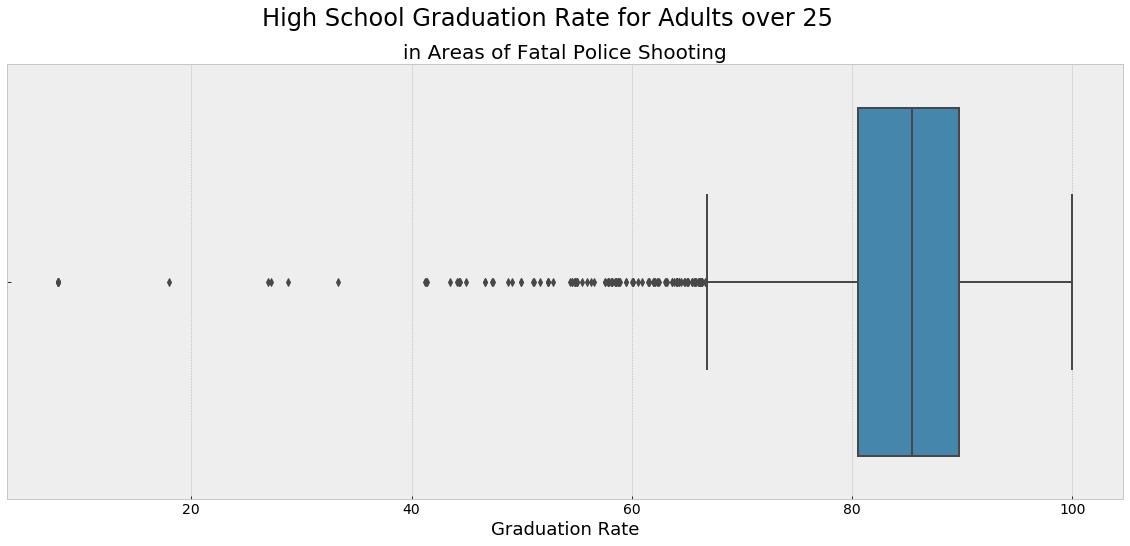

In [25]:
#change figure size
plt.rcParams["figure.figsize"] = (20,8)

#create boxplot
sns.boxplot(x='percent_completed_hs', data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.suptitle('High School Graduation Rate for Adults over 25', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Graduation Rate', fontsize=18)

#display plot
plt.show()

In [26]:
#get upper and lower bounds for graduation rate outliers
grad_low,grad_high = outlier(shootings['percent_completed_hs'])

print('The cutoffs for graduation rate outliers are ', grad_low, 'and', grad_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['percent_completed_hs'] < grad_low) | (shootings['percent_completed_hs'] > grad_high)]

#create bins for outliers below lower cutoff
#since lower cutoff >100, we will ignore higher bins
bins_low = pd.cut(outliers['percent_completed_hs'], [0, 20, 40, 60, grad_low])

#group data & get counts within each bin
outliers.groupby(bins_low)['percent_completed_hs'].agg(['count'])

The cutoffs for graduation rate outliers are  66.7 and 103.5 .


,count
percent_completed_hs,
"(0.0, 20.0]",9
"(20.0, 40.0]",4
"(40.0, 60.0]",71
"(60.0, 66.7]",60


In [27]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['percent_completed_hs'].describe())

#calculate mode
print('\nMode:', shootings['percent_completed_hs'].mode())

count    4806.000000
mean       84.276051
std         8.665110
min         7.900000
25%        80.500000
50%        85.400000
75%        89.700000
max       100.000000
Name: percent_completed_hs, dtype: float64

Mode: 0    75.5
1    80.7
dtype: float64


### Percentage of Population: White

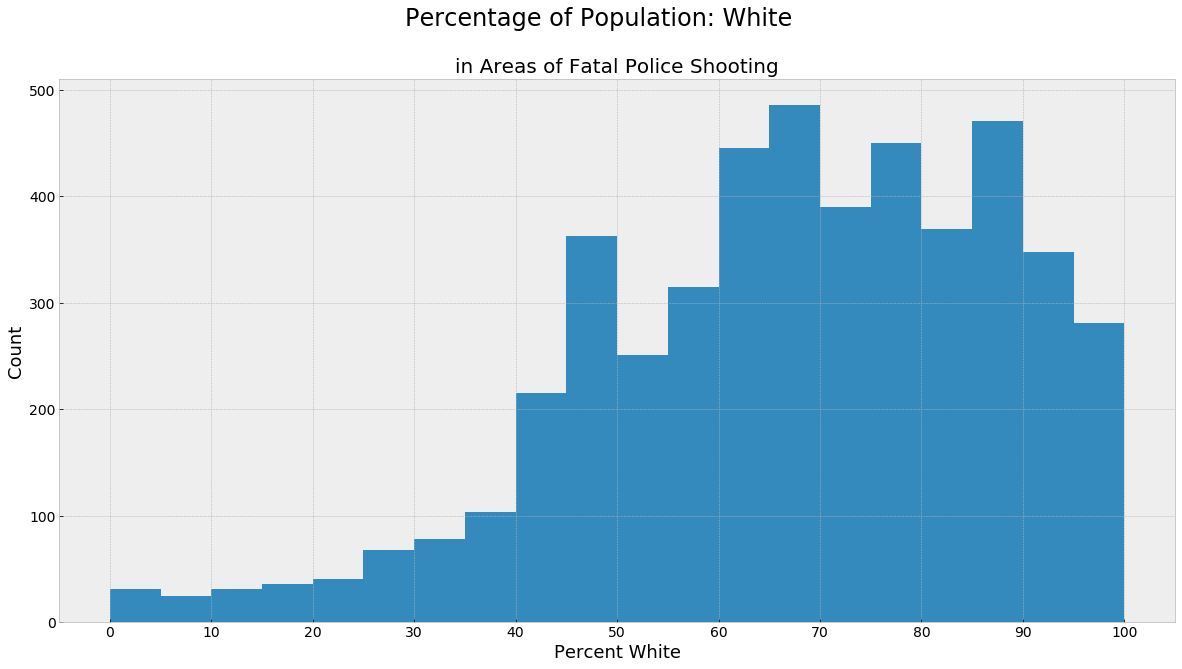

In [28]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#Create histogram of percent population is white
shootings.hist(column = 'share_white', bins=20)

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.suptitle('Percentage of Population: White', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Percent White', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

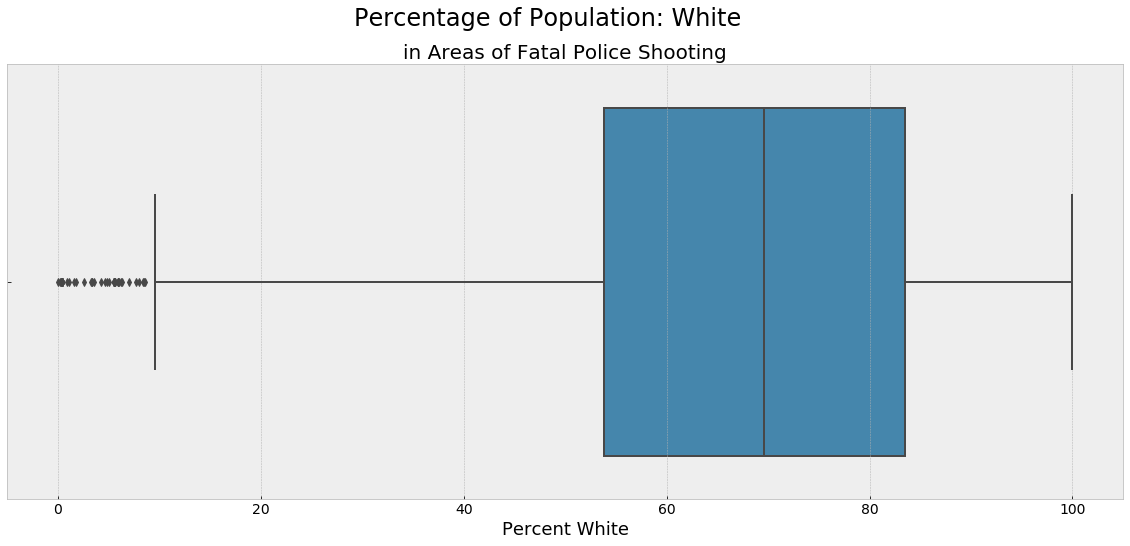

In [29]:
#change figure size
plt.rcParams["figure.figsize"] = (20,8)

#create boxplot
sns.boxplot(x='share_white', data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.suptitle('Percentage of Population: White', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Percent White', fontsize=18)

#display plot
plt.show()

In [30]:
#get upper and lower bounds for graduation rate outliers
white_low,white_high = outlier(shootings['share_white'])

print('The cutoffs for "percentage of population = White" outliers are ', white_low, 'and', white_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['share_white'] < white_low) | (shootings['share_white'] > white_high)]

#get the maximum median income for use in binning
maxwhite = outliers['share_white'].max()

#create bins for outliers below lower cutoff
#since higher cutoff is >100%, we will ignore higher bins
bins_low = pd.cut(outliers['share_white'], [0, 5, white_low])

#group data & get counts within each bin
outliers.groupby(bins_low)['share_white'].agg(['count'])

The cutoffs for "percentage of population = White" outliers are  9.25 and 128.05 .


,count
share_white,
"(0.0, 5.0]",31
"(5.0, 9.25]",22


In [31]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['share_white'].describe())

#calculate mode
print('\nMode:', shootings['share_white'].mode())

count    4798.000000
mean       67.363943
std        20.223445
min         0.000000
25%        53.800000
50%        69.550000
75%        83.500000
max       100.000000
Name: share_white, dtype: float64

Mode: 0    49.8
1    72.6
dtype: float64


### Percentage of Population: Black

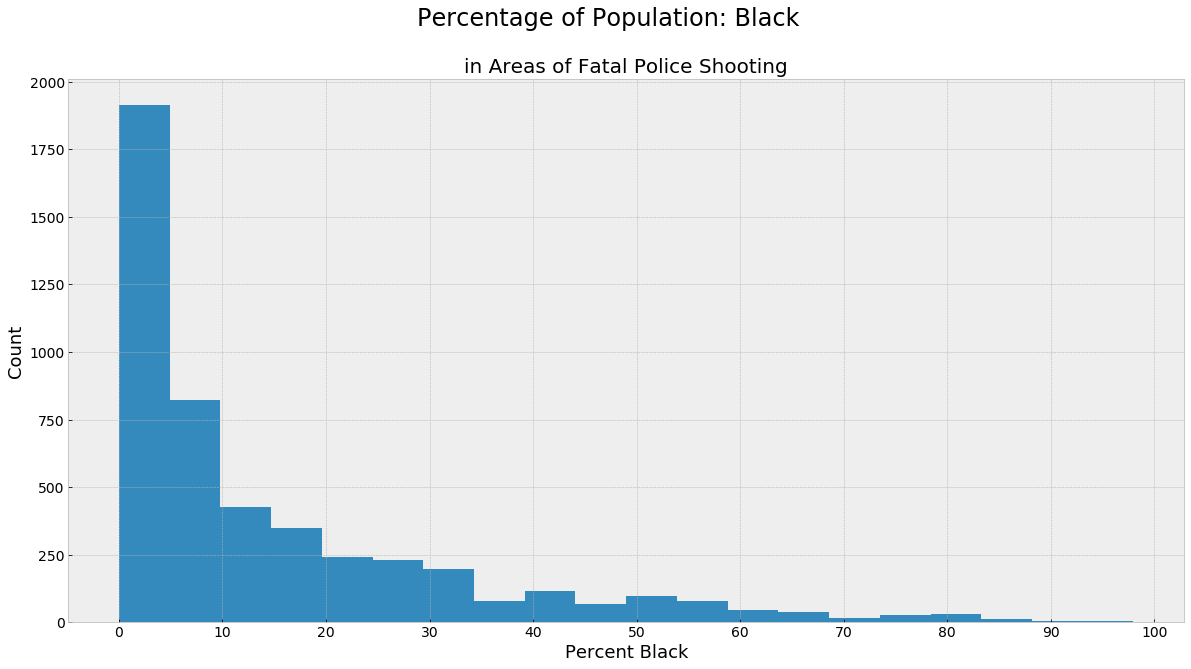

In [32]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#Create histogram of percent population is black
shootings.hist(column = 'share_black', bins=20)

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.suptitle('Percentage of Population: Black', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Percent Black', fontsize=18)
plt.ylabel('Count', fontsize=18)

#display histogram
plt.show()

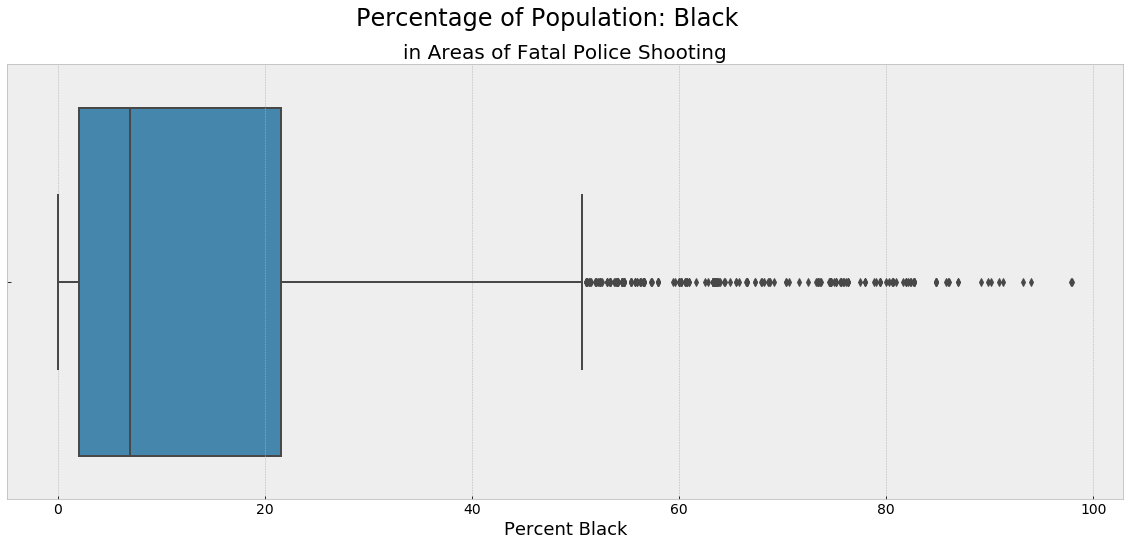

In [33]:
#change figure size
plt.rcParams["figure.figsize"] = (20,8)

#create boxplot
sns.boxplot(x='share_black', data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.suptitle('Percentage of Population: Black', fontsize=24)
plt.title('in Areas of Fatal Police Shooting', fontsize=20)
plt.xlabel('Percent Black', fontsize=18)

#display plot
plt.show()

In [34]:
#get upper and lower bounds for poverty rate outliers
black_low,black_high = outlier(shootings['share_black'])

print('The cutoffs for poverty rate outliers are ', black_low, 'and', black_high, '.')

#create dataframe of outliers
outliers = shootings[(shootings['share_black'] < black_low) | (shootings['share_black'] > black_high)]

#get the maximum median income for use in binning
maxblack = outliers['share_black'].max()

#create bins for outliers above higher cutoff
#since lower cutoff <0, we will ignore lower bins
bins_high = pd.cut(outliers['share_black'], [black_high, 60, 70, 80, 90, maxblack])

#group data & get counts within each bin
outliers.groupby(bins_high)['share_black'].agg(['count'])

The cutoffs for poverty rate outliers are  -27.25 and 50.75 .


,count
share_black,
"(50.75, 60.0]",127
"(60.0, 70.0]",79
"(70.0, 80.0]",49
"(80.0, 90.0]",35
"(90.0, 98.0]",7


In [35]:
#calculate mean, standard deviation, IQR, and min/max
print(shootings['share_black'].describe())

#calculate mode
print('\nMode:', shootings['share_black'].mode())

count    4798.000000
mean       14.762068
std        17.828062
min         0.000000
25%         2.000000
50%         7.000000
75%        21.500000
max        98.000000
Name: share_black, dtype: float64

Mode: 0    0.0
dtype: float64


### Gender

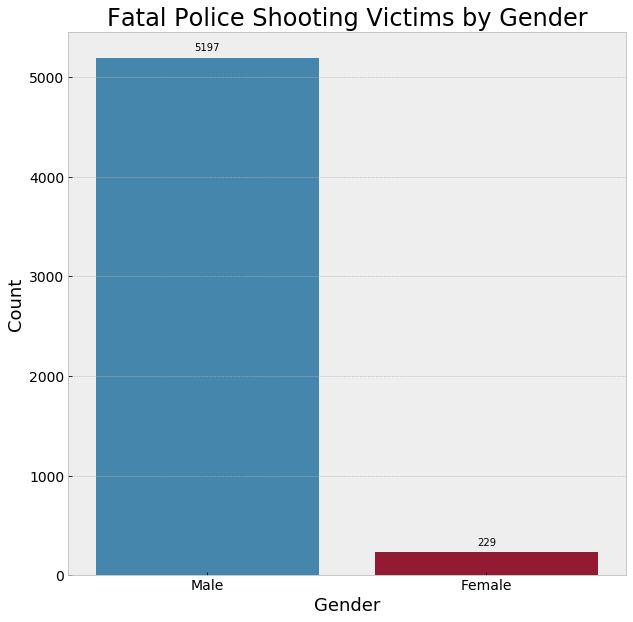

In [36]:
#change figure size
plt.rcParams["figure.figsize"] = (10,10)

#plot count of victims by gender
splot = sns.countplot(shootings['gender'], order = shootings['gender'].value_counts().index)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.title("Fatal Police Shooting Victims by Gender", fontsize=24)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18)

for p in splot.patches:
    splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#display plot
plt.show()

### Race

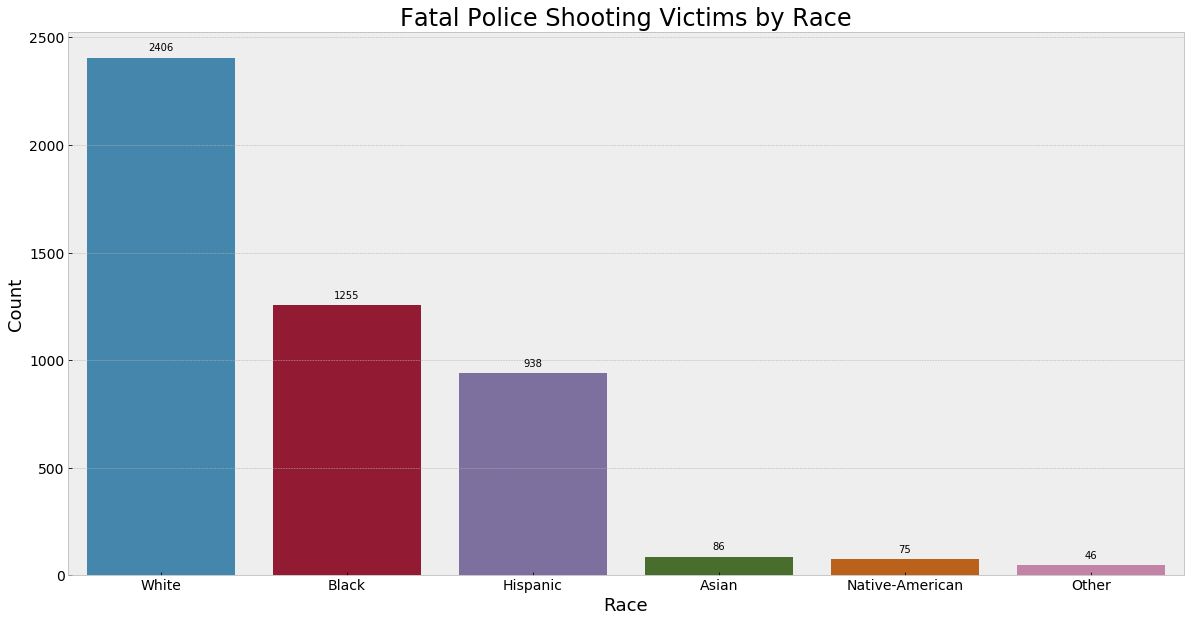

In [37]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#plot count of victims by race
splot = sns.countplot(shootings['race'], order = ['White','Black','Hispanic','Asian','Native-American','Other'])

#modify tick frequency & size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add title & axis labels
plt.title("Fatal Police Shooting Victims by Race", fontsize=24)
plt.xlabel('Race', fontsize=18)
plt.ylabel('Count', fontsize=18)

for p in splot.patches:
    splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#display plot
plt.show()

### Year & Month

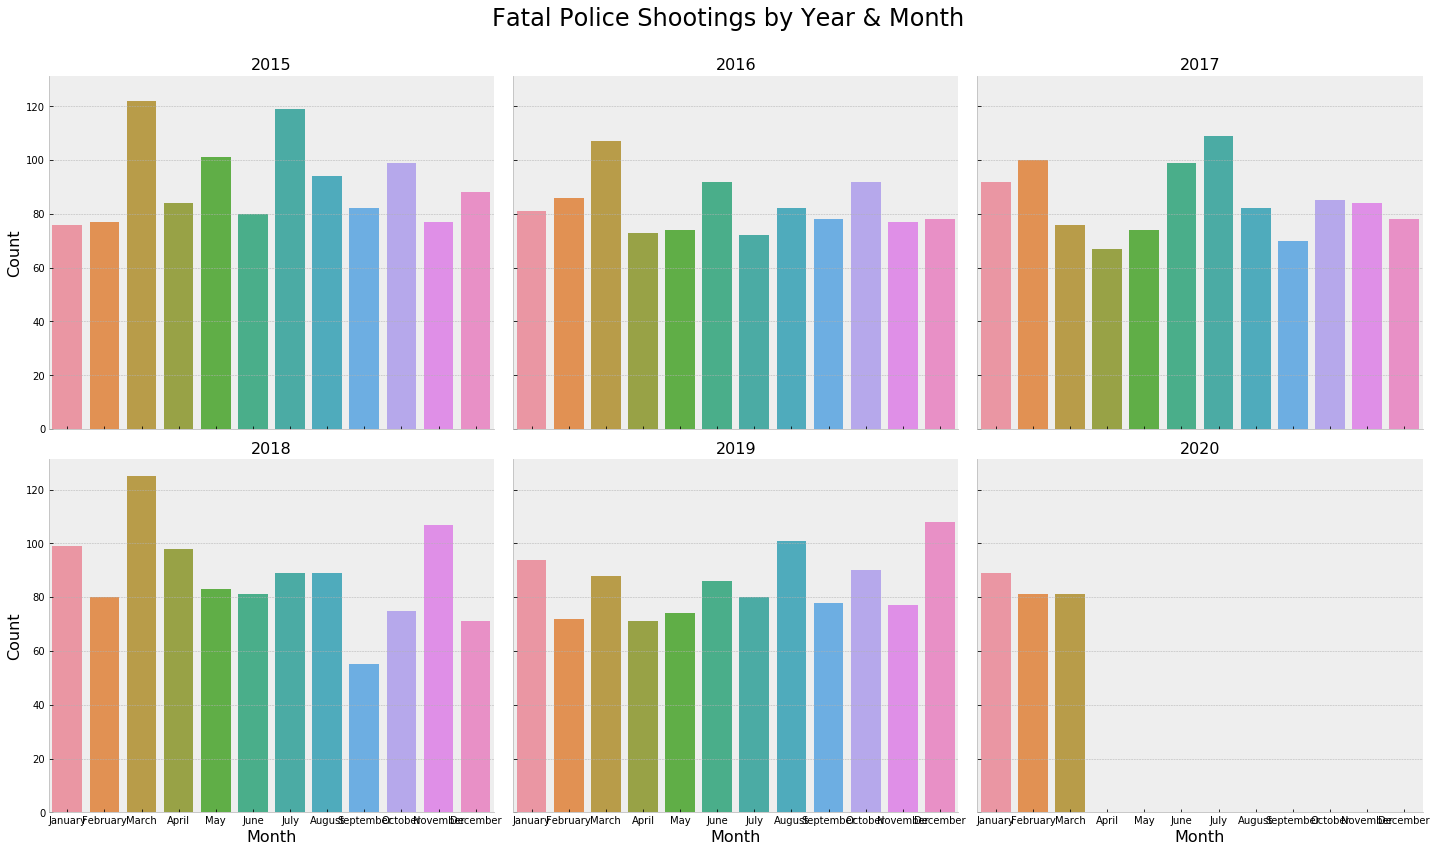

In [38]:
#Create histogram of fatal shooting count per month
#sns.catplot(shootings['date'].dt.strftime("%B"), kind="count", col= (shootings['date'].dt.year))
shootings['month_name'] = shootings['date'].dt.strftime("%B")
shootings['year'] = pd.DatetimeIndex(shootings['date']).year

mthplot = sns.catplot(x='month_name', col='year', data=shootings, kind="count", col_wrap=3, height=6, aspect=1.1)

#Add main title and axis labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Fatal Police Shootings by Year & Month', fontsize=24)
mthplot.set_xlabels('Month', fontsize=16)
mthplot.set_ylabels('Count', fontsize=16)

#add year titles
axes = mthplot.axes.flatten()
axes[0].set_title("2015", fontsize=16)
axes[1].set_title("2016", fontsize=16)
axes[2].set_title("2017", fontsize=16)
axes[3].set_title("2018", fontsize=16)
axes[4].set_title("2019", fontsize=16)
axes[5].set_title("2020", fontsize=16)
    
#display facet plot
plt.show()

### Age & Race

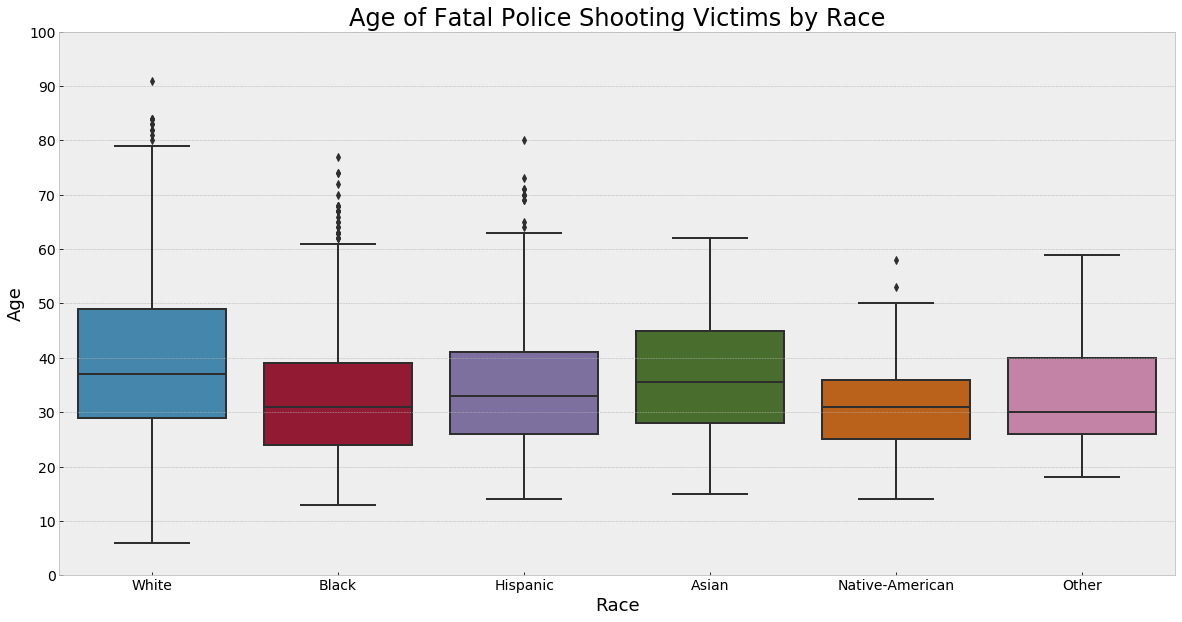

In [39]:
#change figure size
plt.rcParams["figure.figsize"] = (20,10)

#create boxplot of victim age for each racial demographic
sns.boxplot(x='race', y='age', data=shootings, order = ['White','Black','Hispanic','Asian','Native-American','Other'])

#modify tick frequency & size
plt.yticks(np.arange(0, 110, 10), fontsize=14)
plt.xticks(fontsize=14)

#add title & axis labels
plt.title("Age of Fatal Police Shooting Victims by Race", fontsize=24)
plt.xlabel('Race', fontsize=18)
plt.ylabel('Age', fontsize=18)

#display plot
plt.show()

# PMF

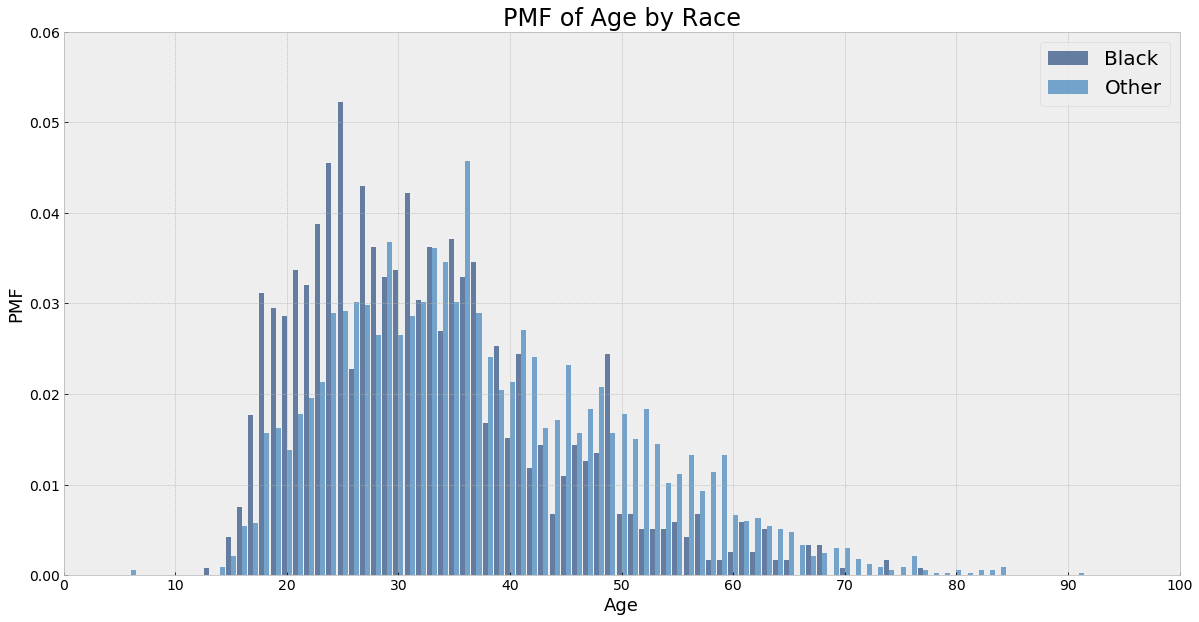

In [40]:
#separate shooting data into two dataframes (Race = Black vs. Other)
#unknown race will be excluded
shootings_men = shootings[shootings.gender =='Male']
race_black = shootings_men[shootings_men.is_black == 'Black']
race_other = shootings_men[shootings_men.is_black == 'Other']

#drop NA values from age
race_black = race_black.dropna(subset=['age'])
race_other = race_other.dropna(subset=['age'])

#convert age to integer
race_black[['age']] = race_black[['age']].astype(int)
race_other[['age']] = race_other[['age']].astype(int)

#calculate PMF for fatal policeshooting victims with race = Black
hist_black = thinkstats2.Hist(race_black.age, label='Black')
n_black = hist_black.Total()
pmf_black = hist_black.Copy()
for x, freq in hist_black.Items():
    pmf_black[x] = freq / n_black

#calculate PMF for fatal police shooting victims with race = Other
hist_other = thinkstats2.Hist(race_other.age, label='Other')
n_other = hist_other.Total()
pmf_other = hist_other.Copy()
for x, freq in hist_other.Items():
    pmf_other[x] = freq / n_other

#plot PMF
width=0.45
axis = [0, 100, 0, .06]
thinkplot.Hist(pmf_black, align='right', width=width)
thinkplot.Hist(pmf_other, align='left', width=width)

#Add axis labels
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

#upper right legend
plt.legend(loc=1,prop={'size':20})

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.title('PMF of Age by Race', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('PMF', fontsize=18)

#display histogram
plt.show()

# CDF

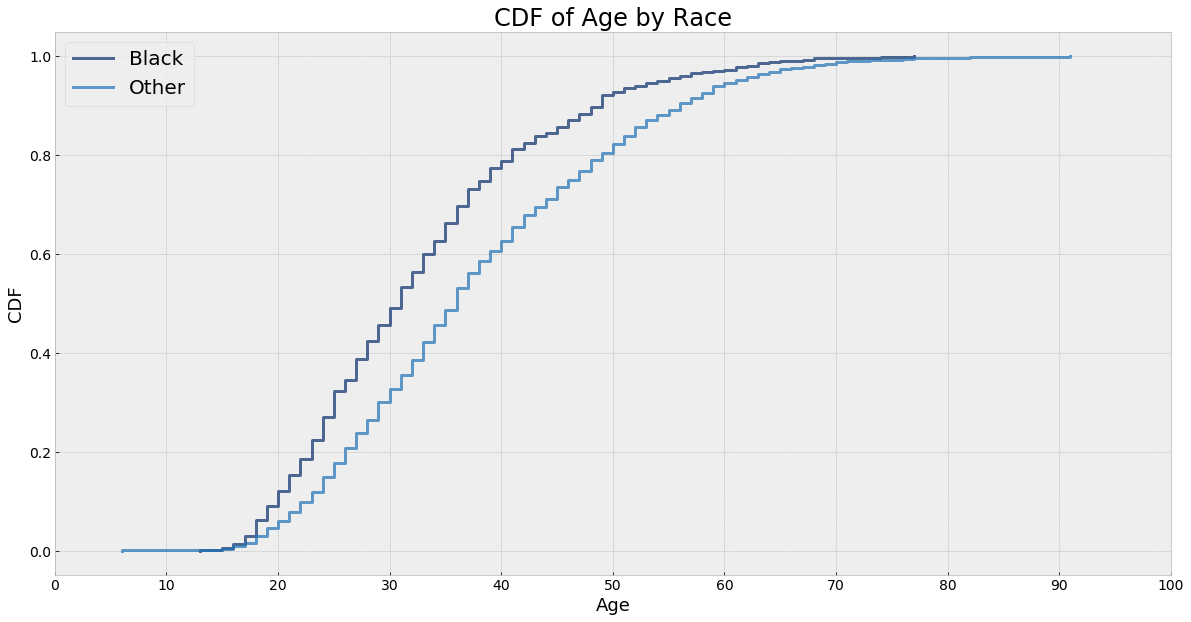

In [41]:
cdf_black = thinkstats2.Cdf(race_black.age, label='Black')
cdf_other = thinkstats2.Cdf(race_other.age, label='Other')

#plot CDFs
thinkplot.Cdfs([cdf_black, cdf_other])

#add legend
#thinkplot.Config(loc='upper left')

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#upper left legend
plt.legend(loc=2,prop={'size':20})

#Add titles and axis labels
plt.title('CDF of Age by Race', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('CDF', fontsize=18)

#display histogram
plt.show()

# Exponential CDF

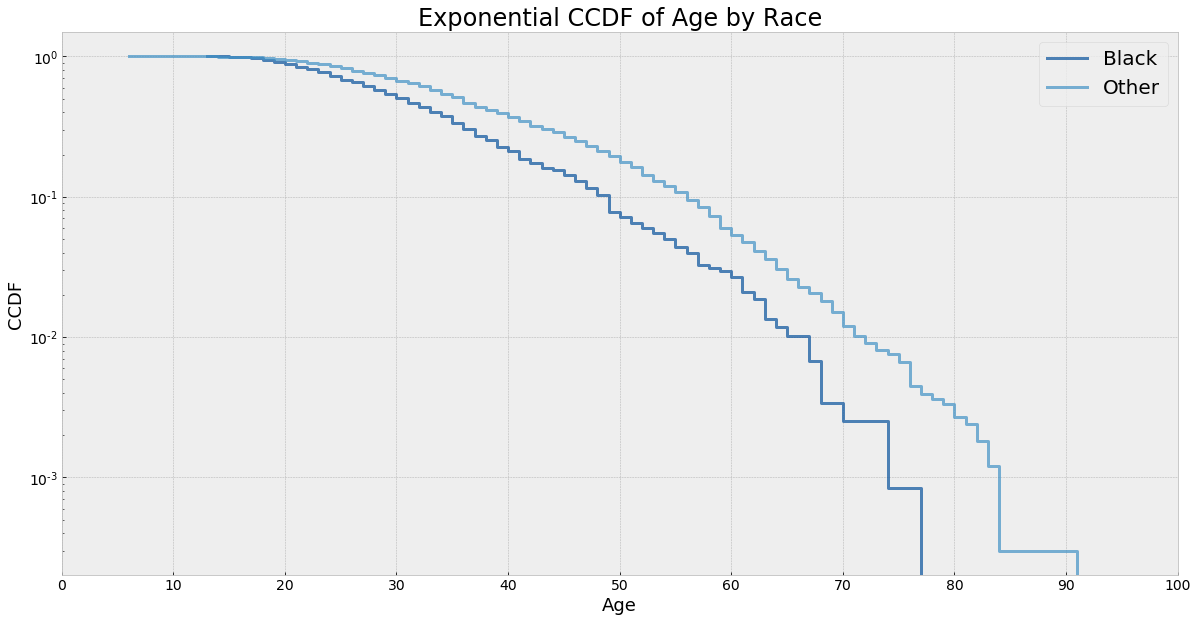

In [42]:
#two plots
thinkplot.PrePlot(2)

#Create complementary CDF on a log-y scale
thinkplot.Cdf(cdf_black, complement=True)
thinkplot.Cdf(cdf_other, complement=True)
thinkplot.Config(yscale='log', loc='upper right')

#upper right legend
plt.legend(loc=1,prop={'size':20})

#modify tick frequency & size
plt.xticks(np.arange(0, 110, 10), fontsize=14)
plt.yticks(fontsize=14)

#Add titles and axis labels
plt.title('Exponential CCDF of Age by Race', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('CCDF', fontsize=18)

#display plot
plt.show()

# Scatter Plots & Correlation Analysis (Ch. 7)

### Correlation Heatmap

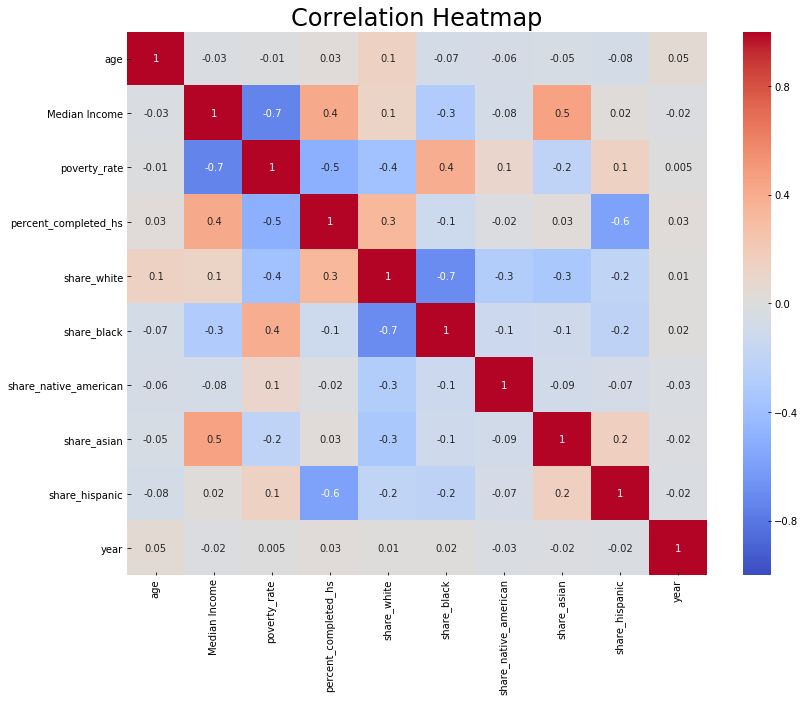

In [43]:
#adjust figure size
plt.rcParams["figure.figsize"] = (13,10)

#create correlation heatmap
ax = sns.heatmap(shootings.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#add title
plt.title("Correlation Heatmap", fontsize=24)

#adjust limits to fix cutoff issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#display plot
plt.show()

###  Scatterplots

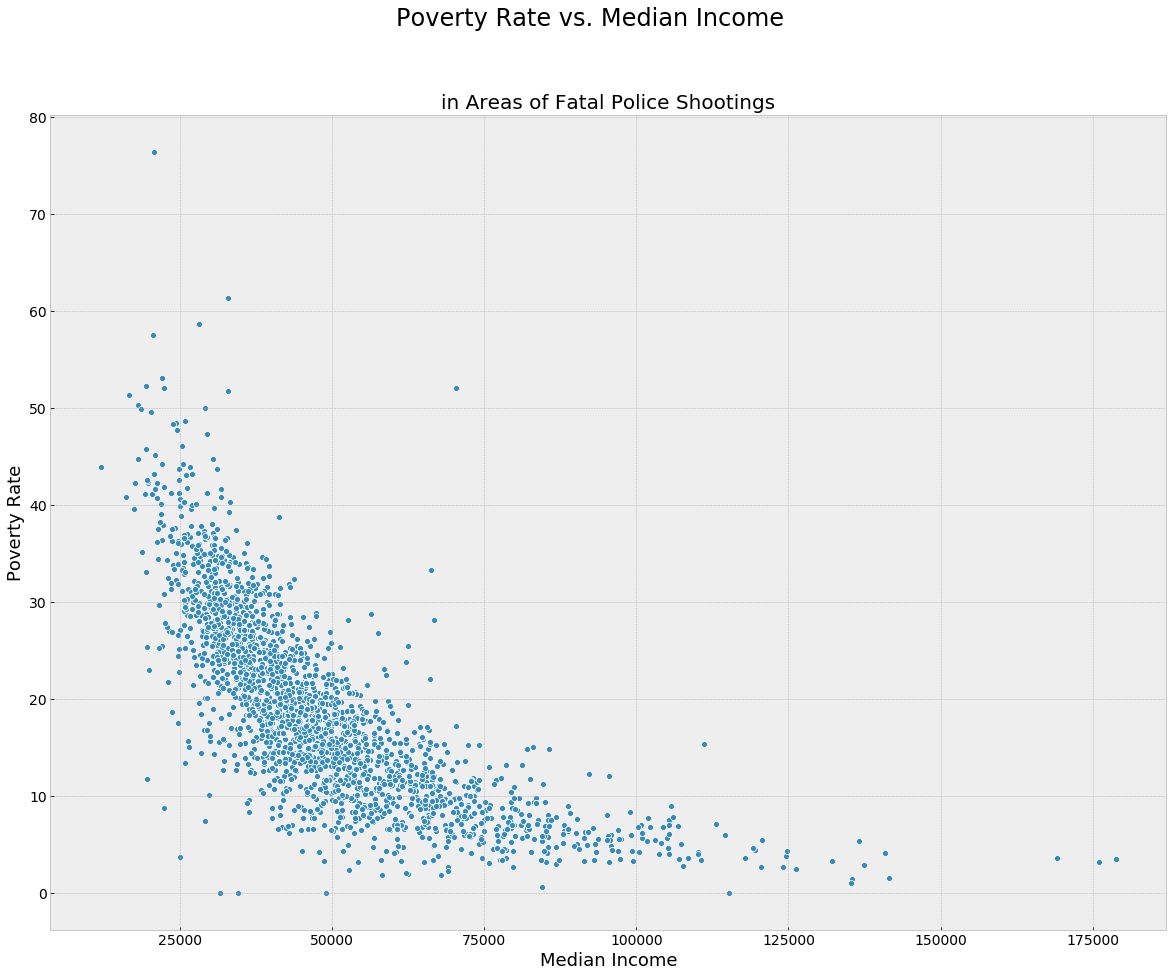

In [44]:
#change figure size
plt.rcParams["figure.figsize"] = (20,15)

#create scatterplot
sns.scatterplot(x="Median Income", y="poverty_rate", data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.suptitle('Poverty Rate vs. Median Income', fontsize=24)
plt.title('in Areas of Fatal Police Shootings', fontsize=20)
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Poverty Rate', fontsize=18)

#display scatterplot
plt.show()

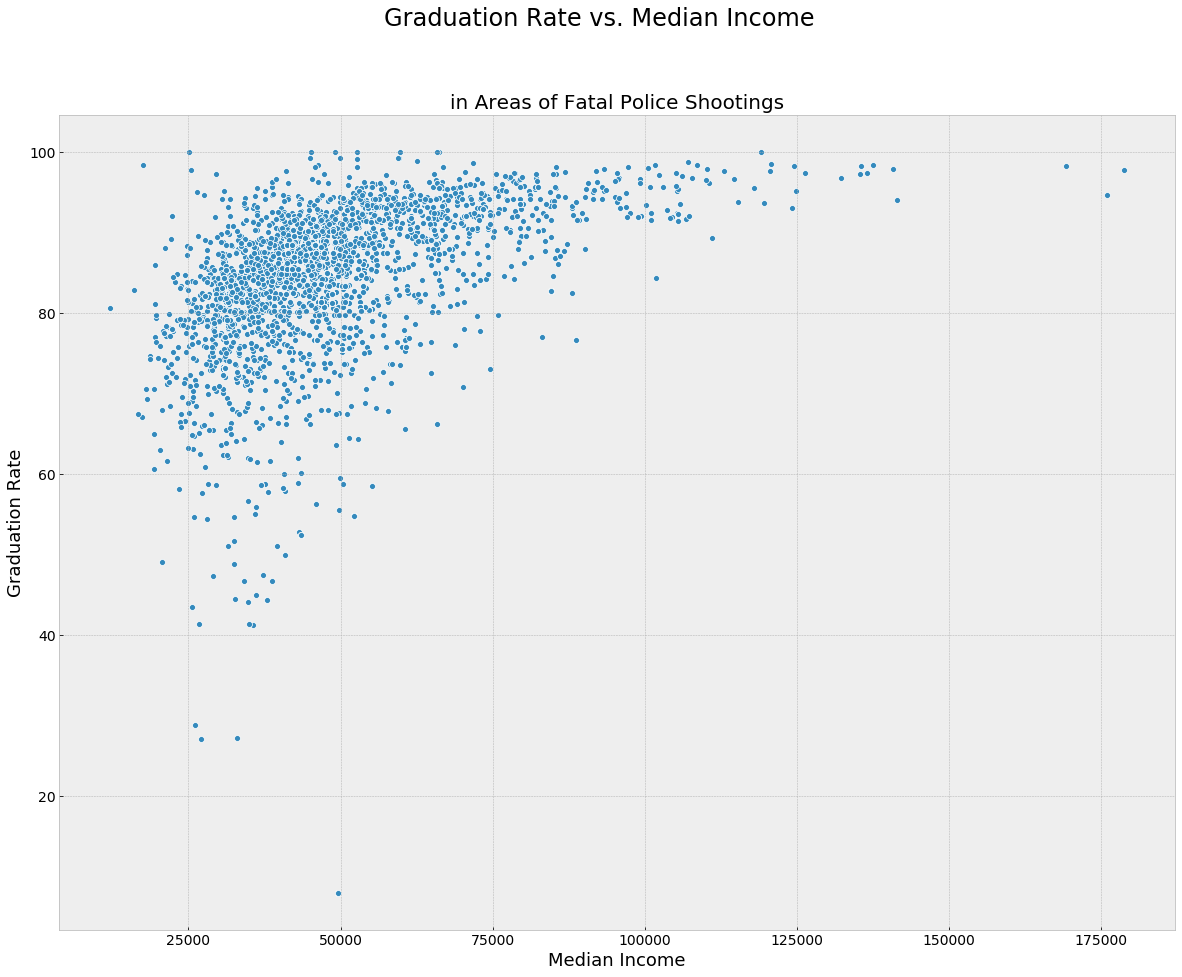

In [45]:
#create scatterplot
sns.scatterplot(x="Median Income", y="percent_completed_hs", data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.suptitle('Graduation Rate vs. Median Income', fontsize=24)
plt.title('in Areas of Fatal Police Shootings', fontsize=20)
plt.xlabel('Median Income', fontsize=18)
plt.ylabel('Graduation Rate', fontsize=18)

#display scatterplot
plt.show()

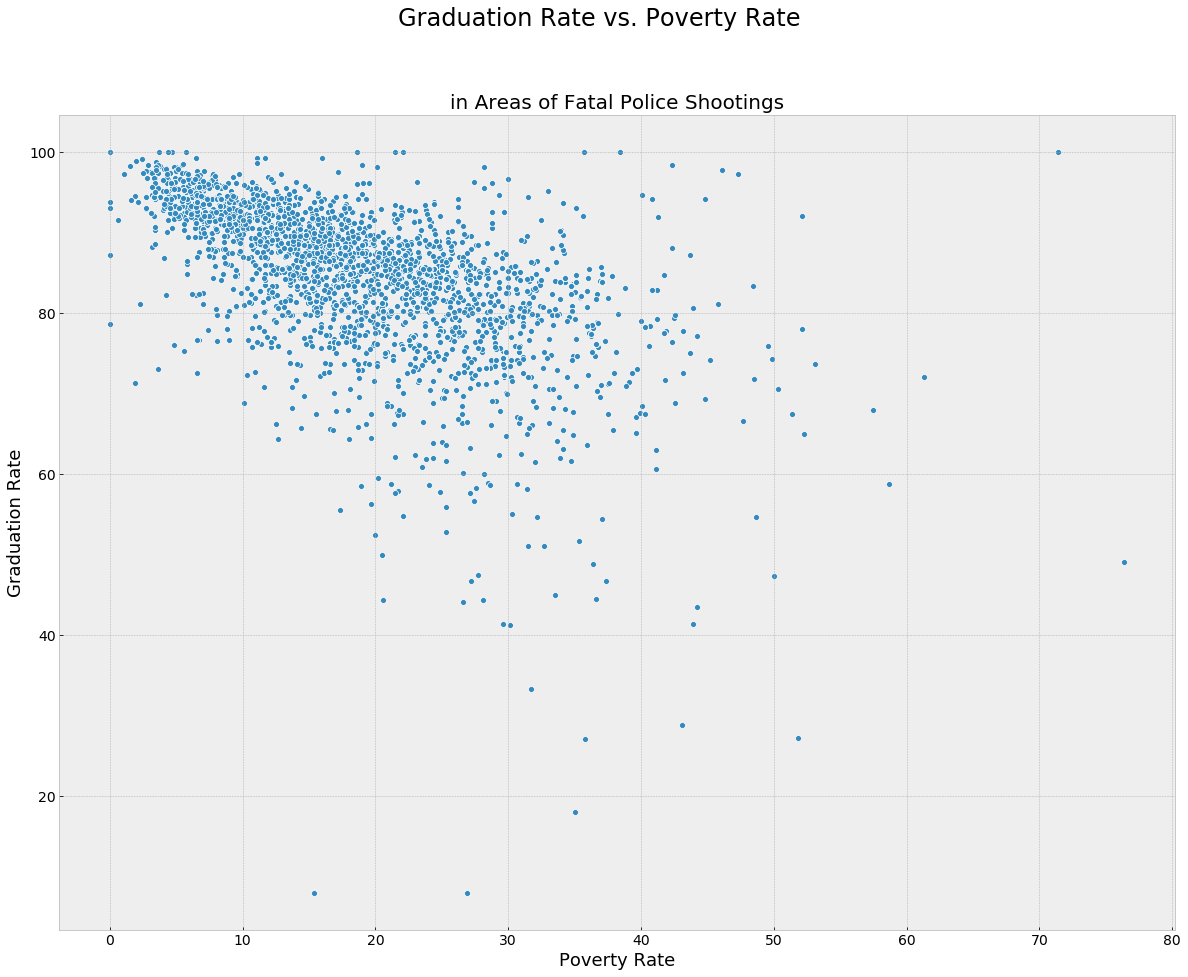

In [46]:
#create scatterplot
sns.scatterplot(x="poverty_rate", y="percent_completed_hs", data=shootings)

#modify tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.suptitle('Graduation Rate vs. Poverty Rate', fontsize=24)
plt.title('in Areas of Fatal Police Shootings', fontsize=20)
plt.xlabel('Poverty Rate', fontsize=18)
plt.ylabel('Graduation Rate', fontsize=18)

#display scatterplot
plt.show()

### Covariance

In [47]:
#calculate covariance for numeric columns
shootings.cov()

,age,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,year
age,168.483465,-5.278632e+03,-1.557792,3.303967,36.639169,-17.139851,-6.544492,-3.972761,-19.873386,0.984811
Median Income,-5278.631909,2.554582e+08,-96555.632548,55161.196651,39948.173690,-84167.625575,-11057.552778,45121.181932,5105.605939,-447.541916
poverty_rate,-1.557792,-9.655563e+04,67.960029,-35.715275,-62.516645,57.421548,7.316801,-10.347225,22.753877,0.058421
percent_completed_hs,3.303967,5.516120e+04,-35.715275,75.084132,57.473896,-17.169856,-1.589919,1.467726,-102.273456,0.359161
share_white,36.639169,3.994817e+04,-62.516645,57.473896,408.987722,-252.765072,-50.013439,-40.159444,-80.742866,0.384693
share_black,-17.139851,-8.416763e+04,57.421548,-17.169856,-252.765072,317.839799,-20.576189,-11.852910,-77.921316,0.410615
share_native_american,-6.544492,-1.105755e+04,7.316801,-1.589919,-50.013439,-20.576189,81.569913,-4.820736,-12.420167,-0.412006
share_asian,-3.972761,4.512118e+04,-10.347225,1.467726,-40.159444,-11.852910,-4.820736,37.839129,19.969295,-0.211338
share_hispanic,-19.873386,5.105606e+03,22.753877,-102.273456,-80.742866,-77.921316,-12.420167,19.969295,408.732748,-0.770907
year,0.984811,-4.475419e+02,0.058421,0.359161,0.384693,0.410615,-0.412006,-0.211338,-0.770907,2.339067


### Pearson's Correlation

In [48]:
#calculate Pearson's Correlation for numeric columns
shootings.corr()

,age,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,year
age,1.000000,-0.025757,-0.014754,0.030269,0.141248,-0.074825,-0.057477,-0.051652,-0.077945,0.049666
Median Income,-0.025757,1.000000,-0.736111,0.416837,0.123656,-0.295072,-0.077191,0.457224,0.015893,-0.018320
poverty_rate,-0.014754,-0.736111,1.000000,-0.499981,-0.375184,0.391121,0.098287,-0.204082,0.136556,0.004630
percent_completed_hs,0.030269,0.416837,-0.499981,1.000000,0.328571,-0.111407,-0.020345,0.027576,-0.584691,0.027081
share_white,0.141248,0.123656,-0.375184,0.328571,1.000000,-0.701064,-0.273821,-0.322821,-0.197483,0.012433
share_black,-0.074825,-0.295072,0.391121,-0.111407,-0.701064,1.000000,-0.127790,-0.108081,-0.216188,0.015054
share_native_american,-0.057477,-0.077191,0.098287,-0.020345,-0.273821,-0.127790,1.000000,-0.086772,-0.068021,-0.029816
share_asian,-0.051652,0.457224,-0.204082,0.027576,-0.322821,-0.108081,-0.086772,1.000000,0.160573,-0.022455
share_hispanic,-0.077945,0.015893,0.136556,-0.584691,-0.197483,-0.216188,-0.068021,0.160573,1.000000,-0.024923
year,0.049666,-0.018320,0.004630,0.027081,0.012433,0.015054,-0.029816,-0.022455,-0.024923,1.000000


### Spearman's Rank Correlation

In [49]:
#calculate Pearson's Correlation for numeric columns to help identify non-linear relationships
shootings.corr(method = 'spearman')

,age,Median Income,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,year
age,1.000000,-0.035178,-0.027781,0.021874,0.141054,-0.084567,-0.027355,-0.091298,-0.073388,0.048995
Median Income,-0.035178,1.000000,-0.780565,0.452645,0.096163,-0.225520,0.083579,0.518818,0.201044,-0.028586
poverty_rate,-0.027781,-0.780565,1.000000,-0.580556,-0.371739,0.374029,0.003998,-0.193172,0.067491,0.006265
percent_completed_hs,0.021874,0.452645,-0.580556,1.000000,0.438627,-0.242472,-0.128322,0.087283,-0.435133,0.005017
share_white,0.141054,0.096163,-0.371739,0.438627,1.000000,-0.703756,-0.056110,-0.389129,-0.326290,0.006230
share_black,-0.084567,-0.225520,0.374029,-0.242472,-0.703756,1.000000,-0.326670,0.182033,-0.013306,0.008331
share_native_american,-0.027355,0.083579,0.003998,-0.128322,-0.056110,-0.326670,1.000000,0.151662,0.469139,0.011488
share_asian,-0.091298,0.518818,-0.193172,0.087283,-0.389129,0.182033,0.151662,1.000000,0.440605,-0.016313
share_hispanic,-0.073388,0.201044,0.067491,-0.435133,-0.326290,-0.013306,0.469139,0.440605,1.000000,-0.012606
year,0.048995,-0.028586,0.006265,0.005017,0.006230,0.008331,0.011488,-0.016313,-0.012606,1.000000


# Hypothesis Testing

In [50]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    #compute the test statistic
    def TestStatistic(self, data):
        
        group1, group2 = data
        
        #compute the absolute difference of means
        test_stat = abs(group1.mean() - group2.mean())
        
        return test_stat

    def MakeModel(self):
        
        group1, group2 = self.data
        
        #records the sizes of the groups (n & m)
        self.n, self.m = len(group1), len(group2)
        
        #combines the groups into one NumPy array
        self.pool = np.hstack((group1, group2))

    #simulates the null hypothesis
    def RunModel(self):
        
        #shuffle the pooled values
        np.random.shuffle(self.pool)
        
        #splits pooled values  into two groups with sizes n and m
        data = self.pool[:self.n], self.pool[self.n:]
        
        return data

In [51]:
#data is a pair of sequences containing Age values; one sequence for each group
data = race_black.age.values, race_other.age.values

#pass age arrays to DiffMeansPermute
ht = DiffMeansPermute(data)

#compute the P-Value
pvalue = ht.PValue()
pct = pvalue*100

#print the p-value
print('The p-value is', pvalue, '.')
print('We expect to see a difference as big as the observed effact about', pct,'percent of the time.')

The p-value is 0.0 .
We expect to see a difference as big as the observed effact about 0.0 percent of the time.


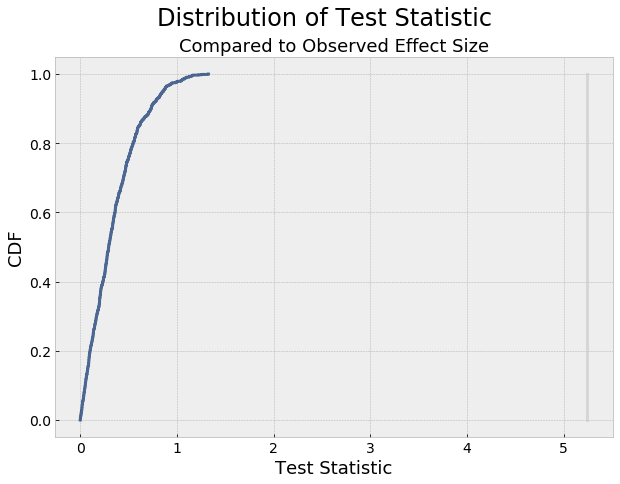

In [52]:
#change figure size
plt.rcParams["figure.figsize"] = (10,7)

#plot distrubution of the test statistic (the difference in means) over many simulated samples
ht.PlotCdf()

#modify tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.suptitle('Distribution of Test Statistic', fontsize=24)
plt.title('Compared to Observed Effect Size', fontsize=18)
plt.xlabel('Test Statistic', fontsize=18)
plt.ylabel('CDF', fontsize=18)

#display scatterplot
plt.show()

# Regression Analysis

In [53]:
#drop NA values for relevant columns
regr = shootings.dropna(subset=['percent_completed_hs', 'poverty_rate'])

#create new sequences for poverty rate & graduation rate
pov = regr.poverty_rate
grad = regr.percent_completed_hs

In [54]:
#takes sequences xs & xy and computes the intercept and slope of the least squares fit.
def LeastSquares(xs, ys):
    #compute mean & variance of first sequence
    meanx, varx = thinkstats2.MeanVar(xs)
    
    #compute mean of second sequence
    meany = thinkstats2.Mean(ys)

    #compute the slope
    slope = thinkstats2.Cov(xs, ys, meanx, meany) / varx
    
    #compute the intercept
    inter = meany - slope * meanx

    return inter, slope

#compute the intercept & slope for poverty rate/graduation rate sequences
inter, slope = LeastSquares(pov, grad)
inter, slope

(94.44087117308099, -0.5255335450920146)

In [55]:
#takes the intercept & slope and evaluates the fitted line at the given xs
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

#create the fitted line
fit_xs, fit_ys = FitLine(pov, inter, slope)

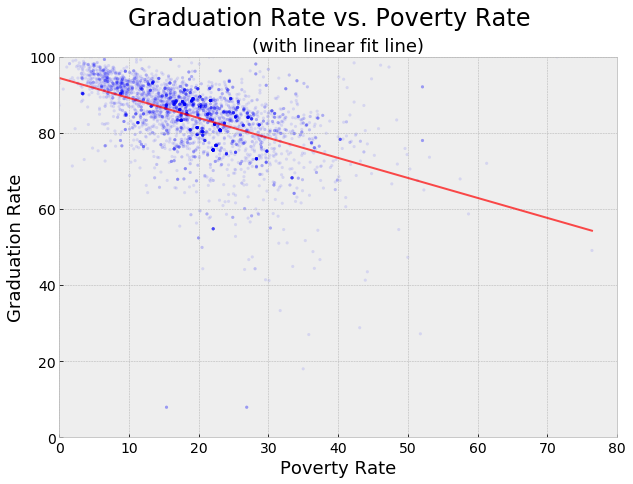

In [56]:
#plot data
thinkplot.Scatter(pov, grad, color='blue', alpha=0.1, s=10)

#plot fit line
#thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)

thinkplot.Config(axis=[0, 80, 0, 100],
                 legend=False)

#modify tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#add titles and axis labels
plt.suptitle('Graduation Rate vs. Poverty Rate', fontsize=24)
plt.title('(with linear fit line)', fontsize=18)
plt.xlabel('Poverty Rate', fontsize=18)
plt.ylabel('Graduation Rate', fontsize=18)

#display scatterplot
plt.show()

In [57]:
#computes the residuals
def Residuals(xs, ys, inter, slope):
    
    #convert sequences to arrays
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    #compute residuals
    res = ys - (inter + slope * xs)
    
    return res

#computes the coefficient of determination
def CoefDetermination(ys, res):
    return 1 - thinkstats2.Var(res) / thinkstats2.Var(ys)

#calculate residuals
res = Residuals(pov, grad, inter, slope)

#calculate R-squared
r2 = CoefDetermination(grad, res)

print('R squared is ', r2, ', meaning poverty rate predicts about 25% of variance in graduation rate.')    

R squared is  0.24998058384037425 , meaning poverty rate predicts about 25% of variance in graduation rate.
